In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/df_norm.csv")
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,-1.433140,1,1,0.410909,0.825070,0,0,1.382928,0,-0.832432,0,0
1,-0.478484,0,2,1.491752,-0.171961,0,0,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,1,-1.525138,0,-0.832432,0,0
3,-0.584556,0,3,0.302825,0.139040,0,0,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,0,-0.581981,0,-0.832432,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,0,-1.210356,0.596393,0,0,-0.188999,0,0.293283,1,1
914,1.536902,1,3,0.627078,-0.053049,1,0,0.164684,0,2.357094,1,1
915,0.370100,1,3,-0.129513,-0.620168,0,0,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,0,2,1.461525,0,-0.832432,1,1


In [3]:
x = df.drop('CŒUR', axis=1)
y = df['CŒUR']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [5]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
modele_rf = RandomForestClassifier()
modele_knn = KNeighborsClassifier()
modele_svc = SVC()
# modele_logistic = LogisticRegression()

In [29]:
# %%timeit

# construction des dictionnaires d’hyperparamètres
dico_param_rf = {"n_estimators":[10,100,1000],"max_depth":[5,7,9]}
dico_param_knn = {"n_neighbors":[2,5,10,50],"weights":['uniform','distance']}
dico_param_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], "kernel":['linear', 'poly', 'rbf']}
dico_param_logistic = {"penalty":['l1','l2', 'elasticnet']}

modele_grid_rf = GridSearchCV(modele_rf, dico_param_rf, n_jobs=-1,
                            scoring="accuracy", cv=5)

modele_grid_knn = GridSearchCV(modele_knn, dico_param_knn, n_jobs=-1,
                             scoring="accuracy", cv=5)

dico_param_svc = GridSearchCV(modele_svc, dico_param_svc, n_jobs=-1,
                             scoring="accuracy", cv=5)

# modele_grid_logistic=GridSearchCV(modele_logistic, modele_logistic, n_jobs=-1,
#                              scoring="accuracy",cv=5)

In [30]:
# for modele_name, modele in modeles.items():
#     mod = modele.fit(x_train,y_train)
#     print(f"{modele_name}\n{mod.best_estimator_}")

In [31]:
modele_knn = modele_grid_knn.fit(x_train,y_train)
modele_knn.best_estimator_

KNeighborsClassifier(n_neighbors=50, weights='distance')

In [32]:
modele_rf = modele_grid_rf.fit(x_train,y_train)
modele_rf.best_estimator_

RandomForestClassifier(max_depth=9)

In [33]:
modele_svc = dico_param_svc.fit(x_train,y_train)
modele_svc.best_estimator_

SVC(C=10, gamma=0.01)

In [34]:
modele_rf = RandomForestClassifier(max_depth=9)
modele_knn = KNeighborsClassifier(n_neighbors=50, weights='distance')
modele_svc = SVC(C=10, gamma=0.01)

In [35]:
modeles = {
    'KNN': modele_knn,
    'RF': modele_grid_rf,
    'SVC': dico_param_svc
}

In [36]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred, target_names=['Abscence', 'Présence']))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train, n_jobs=-1,
                                              cv=5, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), 'ro--', label='train score')
    plt.plot(N, val_score.mean(axis=1), 'bD-.', label='validation score')
    plt.grid()
    plt.legend()

KNN
[[70 13]
 [13 88]]
              precision    recall  f1-score   support

    Abscence       0.84      0.84      0.84        83
    Présence       0.87      0.87      0.87       101

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

RF
[[70 13]
 [ 4 97]]
              precision    recall  f1-score   support

    Abscence       0.95      0.84      0.89        83
    Présence       0.88      0.96      0.92       101

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184

SVC
[[66 17]
 [ 9 92]]
              precision    recall  f1-score   support

    Abscence       0.88      0.80      0.84        83
    Présence       0.84      0.91      0.88       101

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weight

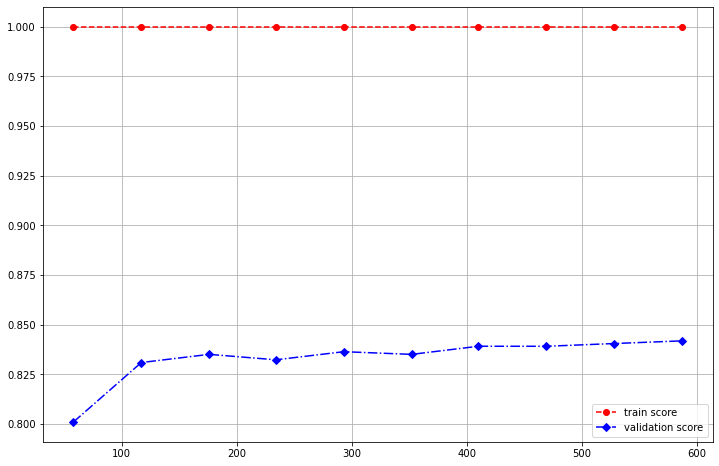

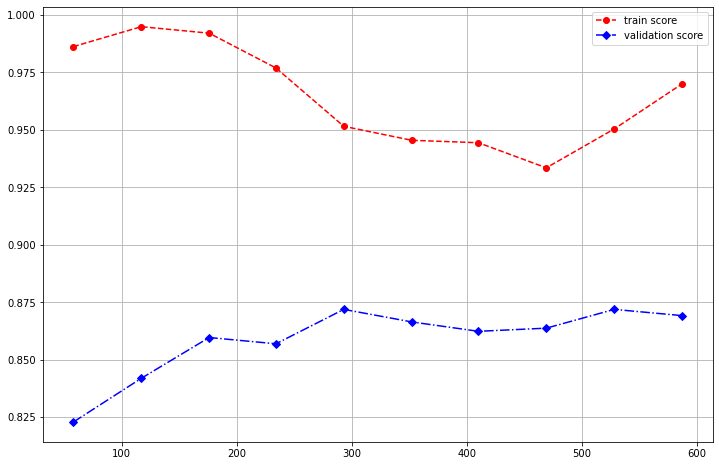

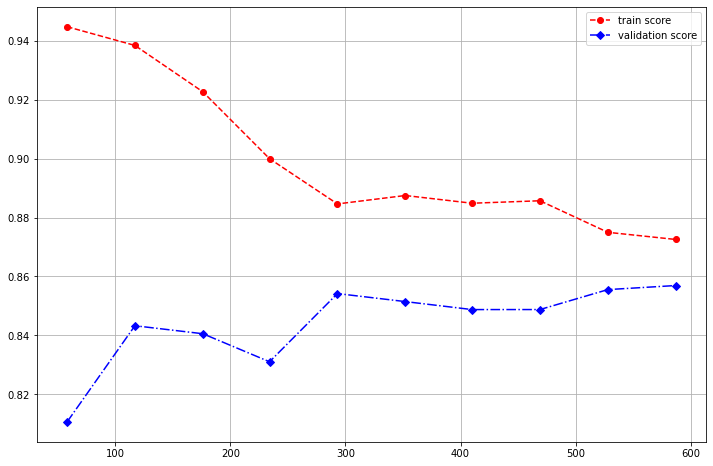

In [37]:
for name, model in modeles.items():
    print(name)
    evaluation(model)